In [ ]:
# Paso 1: Captura una foto usando la webcam desde el navegador
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capturar foto';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      div.appendChild(video);

      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    print(f"Foto guardada como {filename}")

take_photo()

<IPython.core.display.Javascript object>

Foto guardada como photo.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


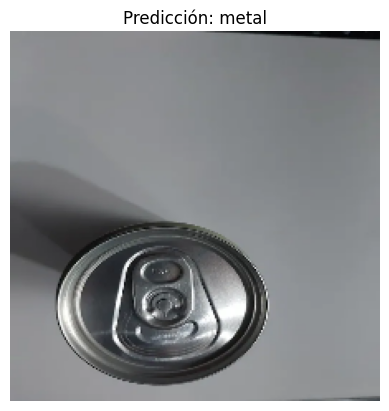

In [ ]:
# Paso 2: Procesa la foto capturada
# Carga el modelo
model = load_model('/content/mod.h5')

class_names = ['paper', 'glass', 'metal', 'trash', 'cardboard', 'plastic']
IMG_SIZE = (224, 224)

# Carga la imagen capturada
img = cv2.imread('unnamed.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, IMG_SIZE)

# Preprocesa
input_img = img_resized.astype('float32') / 255.0
input_img = np.expand_dims(input_img, axis=0)

# Predice
preds = model.predict(input_img)
pred_class = class_names[np.argmax(preds)]

# Muestra el resultado
plt.imshow(img_resized)
plt.title(f'Predicción: {pred_class}')
plt.axis('off')
plt.show()